In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import shapely

In [2]:
cedar=gpd.read_file(r'./ExampleFire/Cedar_2016_line.shp')

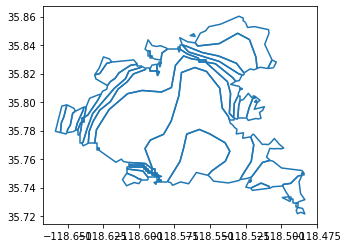

In [5]:
cedar.plot()

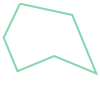

In [12]:
cedar.geometry[0]  

In [15]:
polys=cedar.geometry

In [39]:
uniqpolies = []
uniqpolies.append(cedar.iloc[0,:])
for index,poly in cedar.iterrows():
    if not any(p.geometry.equals(poly.geometry) for p in uniqpolies):
        uniqpolies.append(poly)

In [40]:
len(uniqpolies)

181

In [45]:
uniqpolies=gpd.GeoDataFrame(uniqpolies, crs=cedar.crs)

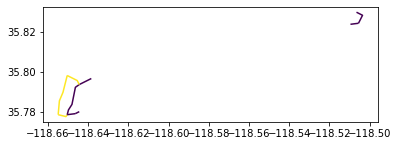

In [74]:
uniqpolies.loc[(uniqpolies.gridcode<=239)&(uniqpolies.gridcode>=238),:].plot(column='gridcode')
#uniqpolies.plot(column='gridcode')

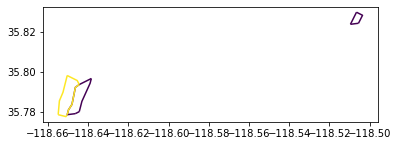

In [75]:
cedar.loc[(cedar.gridcode<=239)&(cedar.gridcode>=238),:].plot(column='gridcode')

In [76]:
#save shapefile
uniqpolies.to_file(r"./ExampleFire/Cedar_2016_frontline.shp")

In [27]:
#if only geometry was extracted and cleaned
#tmp=shapely.geometry.MultiLineString(uniqpolies)
#tmp

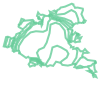

In [28]:
tmp

In [89]:

def Extract_Front_Line(filename):
    '''
    
    argument: 
    #fire: string, the name of the fire  
    filename: string, path and filename (shp) to be read
    
    return: geoDataFrame
    
    read line string files of daily fire progression (converted by 'polygon to line' tool in arcpy)],
    remove duplicated fire boundaries between days and keep fire frontlines
    
    '''
    ##pre-define path and filename to be read
    #read shapefile of the fire (multi-lines)
    fire=gpd.read_file(filename)
    #start from first fire day
    fire=fire.sort_values(by=['gridcode'])
    uniqlines = []
    uniqlines.append(fire.iloc[0,:])
    for index,poly in fire.iterrows():
        if not any(p.geometry.equals(poly.geometry) for p in uniqlines):
            uniqlines.append(poly)
    uniqlines=gpd.GeoDataFrame(uniqlines, crs=fire.crs)
    return uniqlines
            
            
    

In [90]:
Lion_front=Extract_Front_Line(r'./ExampleFire/Lion_2017_line.shp')

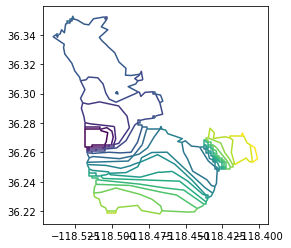

In [91]:
Lion_front.plot(column='gridcode')

In [92]:
Lion_front.gridcode.unique()

array([272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284,
       285, 286, 287, 288, 289, 290], dtype=int64)

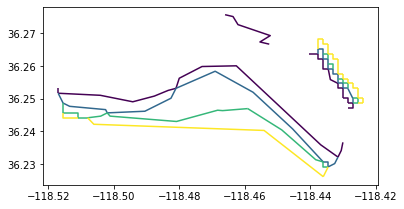

In [94]:
Lion_front.loc[(Lion_front.gridcode<=283)&(Lion_front.gridcode>=280),:].plot(column='gridcode')

In [103]:
#save shapefile
Lion_front.to_file(r"./ExampleFire/Lion_2017_frontline.shp")

In [96]:
Pier_front=Extract_Front_Line(r'./ExampleFire/Pier_2017_line.shp')

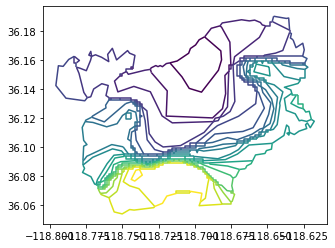

In [97]:
Pier_front.plot(column='gridcode')

In [99]:
Pier_front.gridcode.unique()

array([241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253,
       254, 255, 256, 257, 258, 259, 260], dtype=int64)

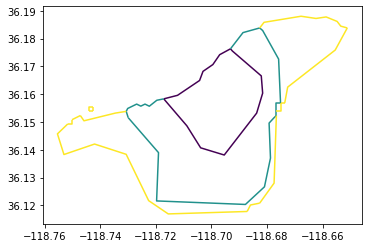

In [101]:
Pier_front.loc[(Pier_front.gridcode<=243)&(Pier_front.gridcode>=241),:].plot(column='gridcode')

In [102]:
#save shapefile
Pier_front.to_file(r"./ExampleFire/Pier_2017_frontline.shp")

Convert all Fire Progression Data

In [104]:
#first convert to lines with arcpy
all_front=Extract_Front_Line(r'./Full_progression_1219_line.shp')

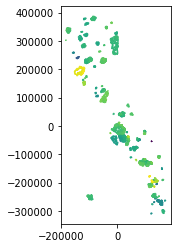

In [107]:
all_front.plot(column='gridcode')

In [108]:
#save shapefile
all_front.to_file(r"./full_progression_1219_frontline.shp")